In [10]:
# # Modul neu laden, falls Änderungen vorgenommen wurden (sonst auskommentiert lassen)
# import importlib
# import ml_model_functions
# importlib.reload(ml_model_functions)

In [11]:
from ml_model_functions import *

In [12]:
# Simulationsparameter
T_C = 100  # Temperatur [°C]
M_r = 136  # relative Molekülmasse [g/mol]
d_nx_ratio = 0.002  # Verhältnis von Schichtdicke zu Anzahl der Gitterpunkte [cm]
t_max = 3600 * 24 * 10  # Gesamte Simulationszeit [s]
dt = 1000  # Zeitschrittgröße [s]

# Definition der Schichten
layers = [
    Layer(material='LDPE', d=0.2, nx=int(0.2 / d_nx_ratio), C_init=220.0, K_value=1.0, density=1),
    Layer(material='HDPE', d=0.2, nx=int(0.2 / d_nx_ratio), C_init=100.0, K_value=1.0, density=1),
    Layer(material='Kontaktphase', d=1.85, nx=int(1.85 / d_nx_ratio), C_init=0.0, K_value=None, density=0.9)
]

# Berechnung der Diffusionskoeffizienten
for layer in layers:
    layer.set_diffusion_coefficient(M_r, T_C)
      

In [13]:
# Starten der Simulation
C_values, C_init, total_masses, x, partitioning_checks = run_simulation(layers, t_max, dt)
total_masses_init = np.trapz(C_init, x)

/var/folders/k7/1bxjcmpx0s92vcgxvxll8ykh0000gn/T/ipykernel_19972/2958550486.py:3: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_masses_init = np.trapz(C_init, x)


In [14]:
# Berechnen der spez. Migrationsmenge
migrated_mass_over_time, time_points = calculate_migrated_mass_over_time(C_values, x, layers, dt, calc_interval = 1)

In [15]:
# Verzeichnis zum Speichern der Ergebnisse
# Pfad entsprechend anpassen
path_name = '/Users/tomhartmann/Desktop/studienarbeit-migrationsmodellierung/data/ML-Modell'

# Datum für den Simulationstitel
current_time = datetime.now().strftime("%Y%m%d")
time_days = int(t_max / (3600 * 24))
materials = "_".join([layer.material for layer in layers])

simulation_name = f"{current_time}_sim_{time_days}days_T{T_C}C_M{M_r}g_{materials}"

full_path = os.path.join(path_name, simulation_name)
if not os.path.exists(full_path):
    os.makedirs(full_path)
    
# Speichern der Ergebnisse als NumPy Datei im Containerformat für die spätere Weiterverarbeitung
np.savez(os.path.join(full_path, 'data.npz'), 
         C_init=C_init, 
         C_values=C_values, 
         total_masses=total_masses, 
         total_masses_init=total_masses_init, 
         x=x, 
         partitioning_checks=partitioning_checks, 
         migrated_mass_over_time=migrated_mass_over_time, 
         time_points=time_points)


Konzentrationsplot gespeichert unter: /Users/tomhartmann/Desktop/studienarbeit-migrationsmodellierung/data/ML-Modell/20250625_sim_10days_T100C_M136g_LDPE_HDPE_Kontaktphase/concentration_plot.pdf


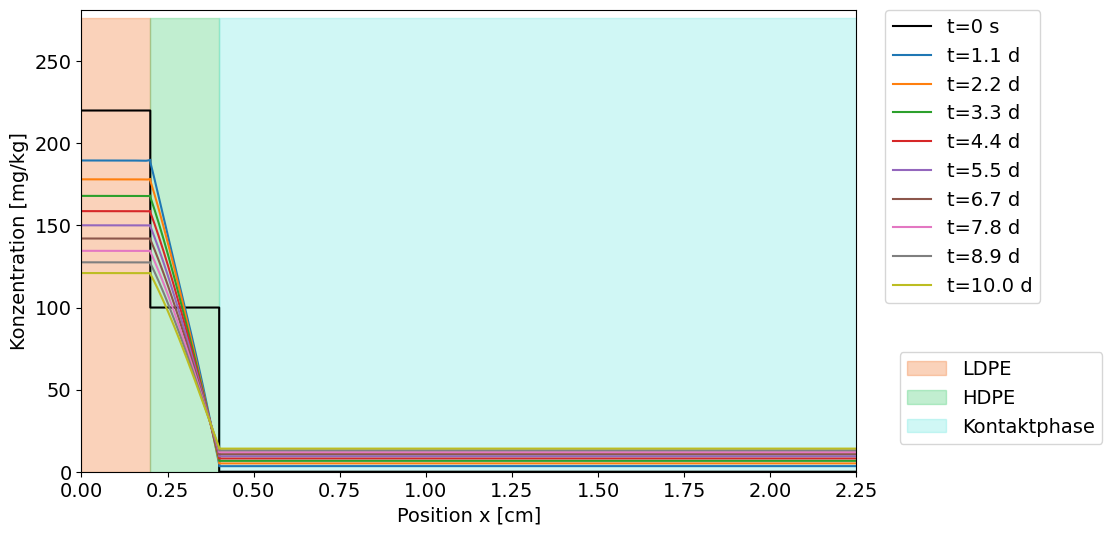

In [16]:
plot_results(C_values, C_init, x, layers, dt, steps_to_plot=10, log_scale=False, save_path=full_path)

Migrationsplot gespeichert unter: /Users/tomhartmann/Desktop/studienarbeit-migrationsmodellierung/data/ML-Modell/20250625_sim_10days_T100C_M136g_LDPE_HDPE_Kontaktphase/migrated_mass_plot.pdf


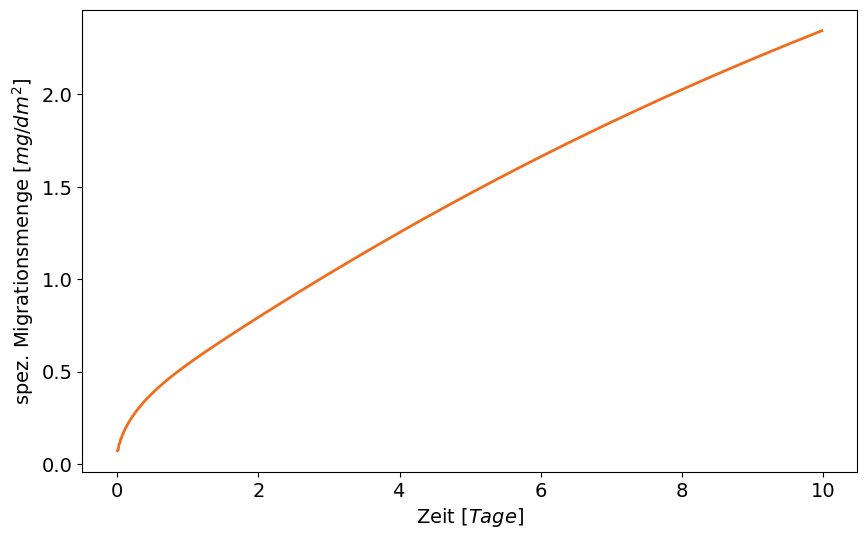

In [17]:
plot_migrated_mass_over_time(migrated_mass_over_time, time_points, save_path=full_path)

Plot der Massenerhaltung gespeichert unter: /Users/tomhartmann/Desktop/studienarbeit-migrationsmodellierung/data/ML-Modell/20250625_sim_10days_T100C_M136g_LDPE_HDPE_Kontaktphase/mass_conservation_plot.pdf


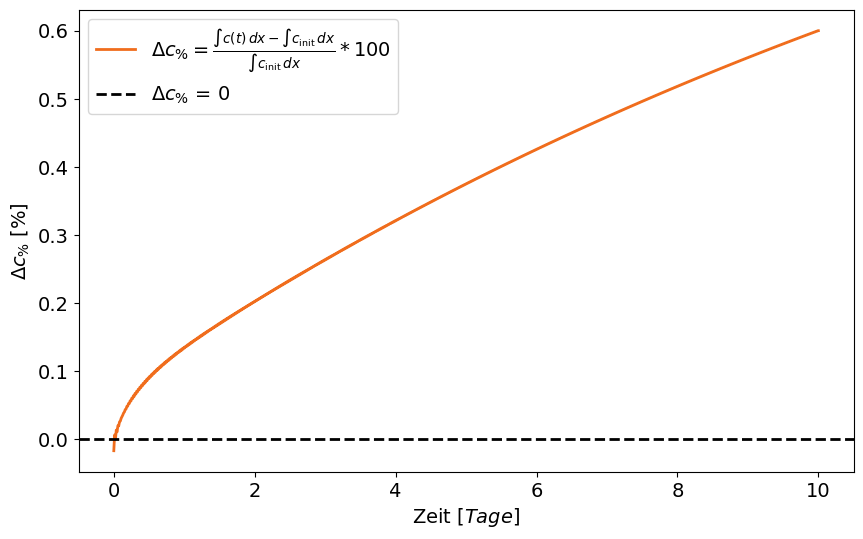

In [18]:
plot_mass_conservation(total_masses, total_masses_init, t_max, len(C_values), plot_interval = 1, save_path=full_path)